In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
import os

In [2]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations
#plt.switch_backend('GTKAgg')
%matplotlib inline

In [3]:
location='C://Users/pmlef/Documents/Python_work/Python_for_Data_Analysis/GeoSpatial Data/data/'
df_det_trim=pd.read_csv(location+'detail_trim2.csv',na_values=".", encoding='utf-8')

In [4]:
df_det_trim.head()

,BEGIN_DATE_TIME,YEAR,MONTH_NAME,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,EVENT_TYPE,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
0,28-APR-50 14:45:00,1950,April,28,1445,NaN,10096222,OKLAHOMA,Tornado,CST,0,0,0,0,250000.0,NaN,35.12,-99.20
1,29-APR-50 15:30:00,1950,April,29,1530,NaN,10120412,TEXAS,Tornado,CST,0,0,0,0,25000.0,NaN,31.90,-98.60
2,05-JUL-50 18:00:00,1950,July,5,1800,NaN,10104927,PENNSYLVANIA,Tornado,CST,2,0,0,0,25000.0,NaN,40.58,-75.70
3,05-JUL-50 18:30:00,1950,July,5,1830,NaN,10104928,PENNSYLVANIA,Tornado,CST,0,0,0,0,2500.0,NaN,40.60,-76.75
4,24-JUL-50 14:40:00,1950,July,24,1440,NaN,10104929,PENNSYLVANIA,Tornado,CST,0,0,0,0,2500.0,NaN,41.63,-79.68


In [5]:
df_det_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471788 entries, 0 to 1471787
Data columns (total 18 columns):
BEGIN_DATE_TIME      1471788 non-null object
YEAR                 1471788 non-null int64
MONTH_NAME           1471788 non-null object
BEGIN_DAY            1471788 non-null int64
BEGIN_TIME           1471788 non-null int64
EPISODE_ID           1239549 non-null float64
EVENT_ID             1471788 non-null int64
STATE                1471787 non-null object
EVENT_TYPE           1471788 non-null object
CZ_TIMEZONE          1471788 non-null object
INJURIES_DIRECT      1471788 non-null int64
INJURIES_INDIRECT    1471788 non-null int64
DEATHS_DIRECT        1471788 non-null int64
DEATHS_INDIRECT      1471788 non-null int64
DAMAGE_PROPERTY      975523 non-null float64
DAMAGE_CROPS         683088 non-null float64
BEGIN_LAT            910254 non-null float64
BEGIN_LON            910254 non-null float64
dtypes: float64(5), int64(8), object(5)
memory usage: 202.1+ MB


In [6]:
dmg_crops=df_det_trim['DAMAGE_CROPS']
dmg_prop=df_det_trim['DAMAGE_PROPERTY']

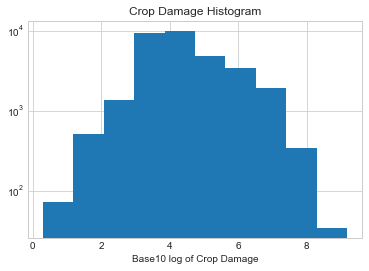

In [7]:
plt.hist(np.log10(dmg_crops[dmg_crops>0]),log=True)
plt.title('Crop Damage Histogram')
plt.xlabel('Base10 log of Crop Damage')
plt.show()

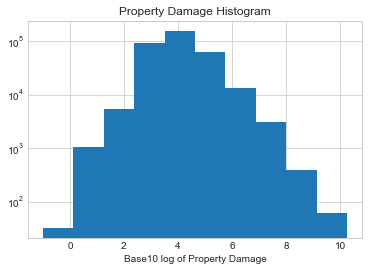

In [8]:
plt.hist(np.log10(dmg_prop[dmg_prop>0]),log=True)
plt.title('Property Damage Histogram')
plt.xlabel('Base10 log of Property Damage')
plt.show()

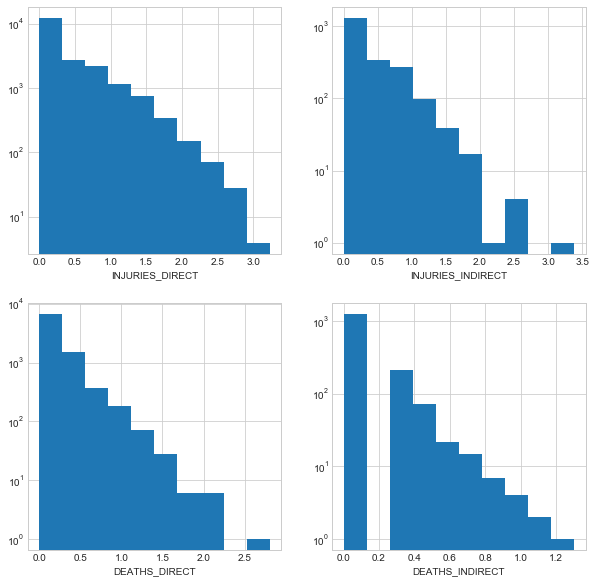

In [9]:
name_list=['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT']
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    name=name_list[i]
    msk=df_det_trim[name]>0
    plt.hist(np.log10(df_det_trim.loc[msk,name]),log=True)
    plt.xlabel(name)

plt.show()

In [41]:
df=df_det_trim

In [43]:
dfyear = df_det_trim.groupby(['YEAR'], as_index=False).sum()
dfyear['DAMAGE_PROPERTY']=(dfyear['DAMAGE_PROPERTY']/1000000)
dfyear.head()

,YEAR,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
0,1950,3202,314212,NaN,2242278541,659,0,70,0,34.48165,NaN,8082.38,-20646.45
1,1951,4464,435777,NaN,2704694739,524,0,34,0,65.50599,NaN,10102.02,-25335.46
2,1952,4637,413442,NaN,2734846526,1916,0,231,0,94.30224,NaN,10019.16,-24811.34
3,1953,6857,766693,NaN,4948760119,5131,0,519,0,596.10470,NaN,18425.51,-45633.11
4,1954,10364,907416,NaN,6125921867,715,0,36,0,85.80532,NaN,22554.09,-56320.36


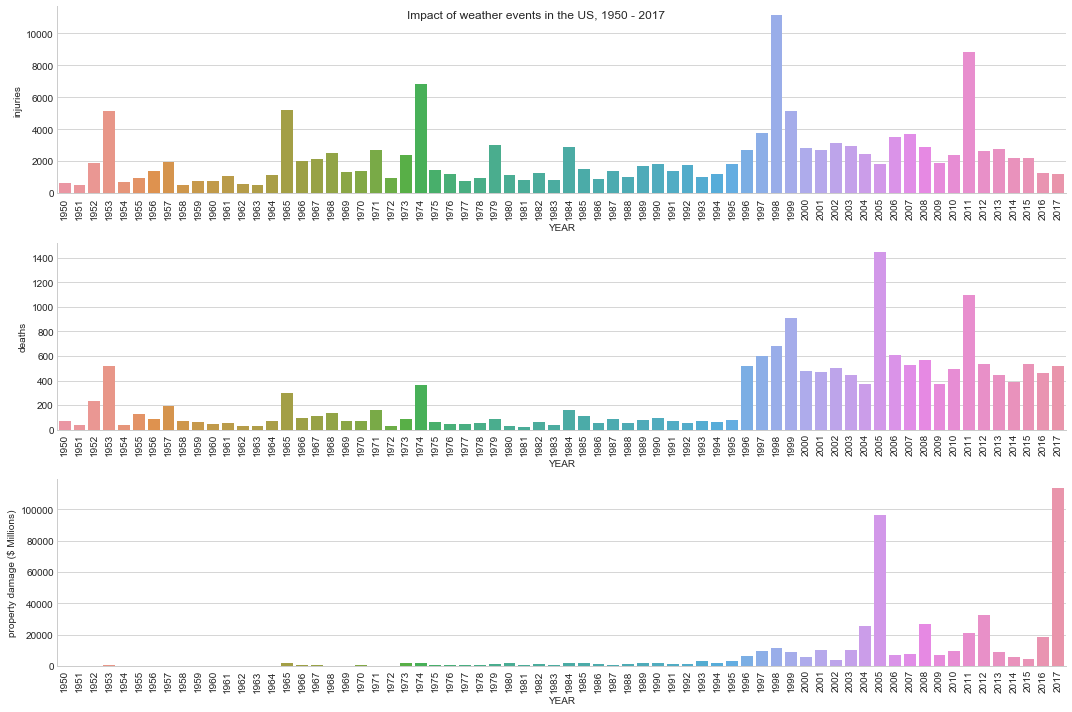

In [49]:
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.suptitle("Impact of weather events in the US, 1950 - 2017")

plt.subplot(3,1,1)
ax=sns.barplot(x='YEAR',y='INJURIES_DIRECT', data=dfyear)
sns.despine()
plt.ylabel('injuries')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.subplot(3,1,2)
ax=sns.barplot(x='YEAR',y='DEATHS_DIRECT', data=dfyear)
sns.despine()
plt.ylabel('deaths')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.subplot(3,1,3)
ax=sns.barplot(x='YEAR',y=dfyear['DAMAGE_PROPERTY'], data=dfyear)
sns.despine()
plt.ylabel('property damage ($ Millions)')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()